
Model: Logistic Regression
Pastry: 93.06%
Z_Scratch: 96.92%
K_Scatch: 97.69%
Stains: 99.49%
Dirtiness: 98.20%
Bumps: 84.58%
Other_Faults: 75.84%
Average Accuracy: 92.25%

Model: KNN
Pastry: 91.00%
Z_Scratch: 96.66%
K_Scatch: 96.92%
Stains: 99.23%
Dirtiness: 97.94%
Bumps: 86.63%
Other_Faults: 77.89%
Average Accuracy: 92.32%

Model: Decision Tree
Pastry: 89.72%
Z_Scratch: 98.46%
K_Scatch: 96.40%
Stains: 99.23%
Dirtiness: 97.43%
Bumps: 86.63%
Other_Faults: 75.32%
Average Accuracy: 91.88%

Model: Random Forest
Pastry: 94.34%
Z_Scratch: 98.46%
K_Scatch: 98.20%
Stains: 99.74%
Dirtiness: 98.71%
Bumps: 87.15%
Other_Faults: 81.49%
Average Accuracy: 94.01%

Model: SVC
Pastry: 93.06%
Z_Scratch: 96.92%
K_Scatch: 97.17%
Stains: 99.23%
Dirtiness: 98.20%
Bumps: 85.35%
Other_Faults: 78.41%
Average Accuracy: 92.62%

Model Comparison:
Logistic Regression: 92.25%
KNN: 92.32%
Decision Tree: 91.88%
Random Forest: 94.01%
SVC: 92.62%


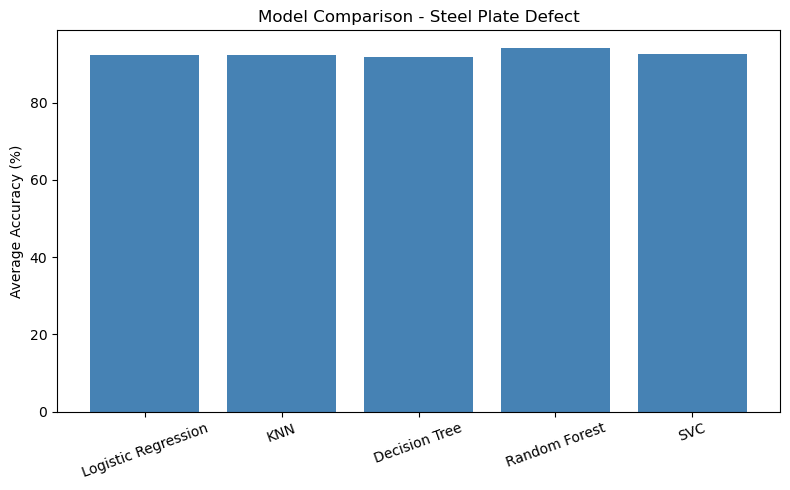

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv("Original.csv")
df.drop(columns=["id"], inplace=True)

target_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
X = df.drop(columns=target_cols)
y = df[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(probability=True)
}

results = {}

for name, base_model in models.items():
    print(f"\nModel: {name}")
    model = MultiOutputClassifier(base_model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracies = []
    for i, label in enumerate(target_cols):
        acc = accuracy_score(y_test.iloc[:, i], y_pred[:, i])
        print(f"{label}: {acc * 100:.2f}%")
        accuracies.append(acc)

    avg_acc = np.mean(accuracies)
    results[name] = avg_acc
    print(f"Average Accuracy: {avg_acc * 100:.2f}%")

print("\nModel Comparison:")
for model_name, score in results.items():
    print(f"{model_name}: {score * 100:.2f}%")

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), [v * 100 for v in results.values()], color="steelblue")
plt.ylabel("Average Accuracy (%)")
plt.title("Model Comparison - Steel Plate Defect")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()
